In [ ]:
pip install xgboost

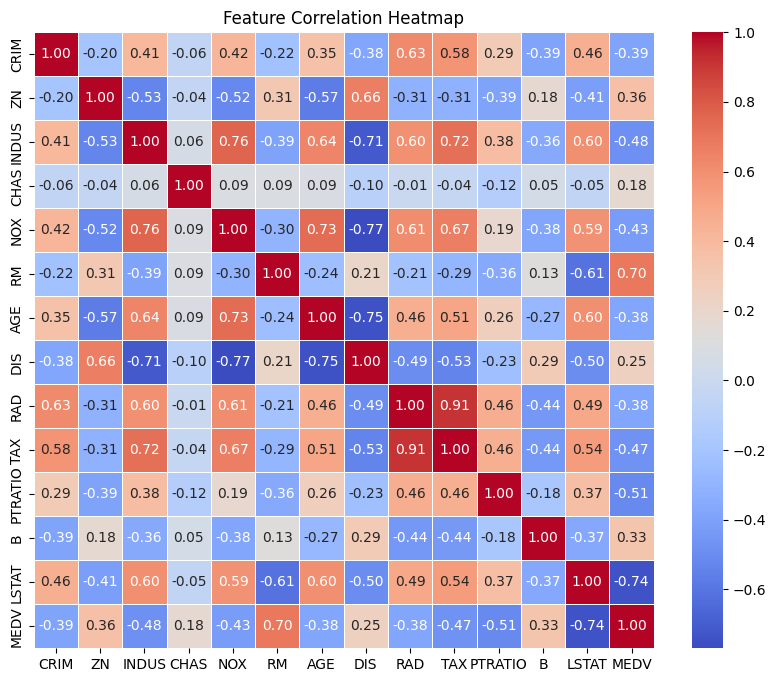

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

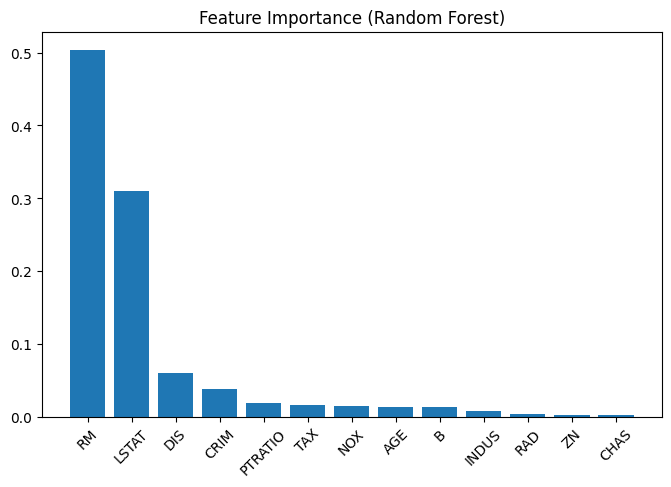

In [3]:
# Split data
X = df.drop(columns=["MEDV"])  # All features except target
y = df["MEDV"]  # Target (house price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[sorted_idx], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [4]:
from sklearn.feature_selection import RFE

# Use Linear Regression for feature selection
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Convert to NumPy arrays and ensure they are 2D
X_train_selected = np.array(X_train_selected, dtype=np.float64)
X_test_selected = np.array(X_test_selected, dtype=np.float64)

X_train_selected = X_train_selected.reshape(-1, 1) if X_train_selected.ndim == 1 else X_train_selected
X_test_selected = X_test_selected.reshape(-1, 1) if X_test_selected.ndim == 1 else X_test_selected

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.2f}")

Linear Regression MSE: 33.50
Random Forest MSE: 14.84
XGBoost MSE: 10.31


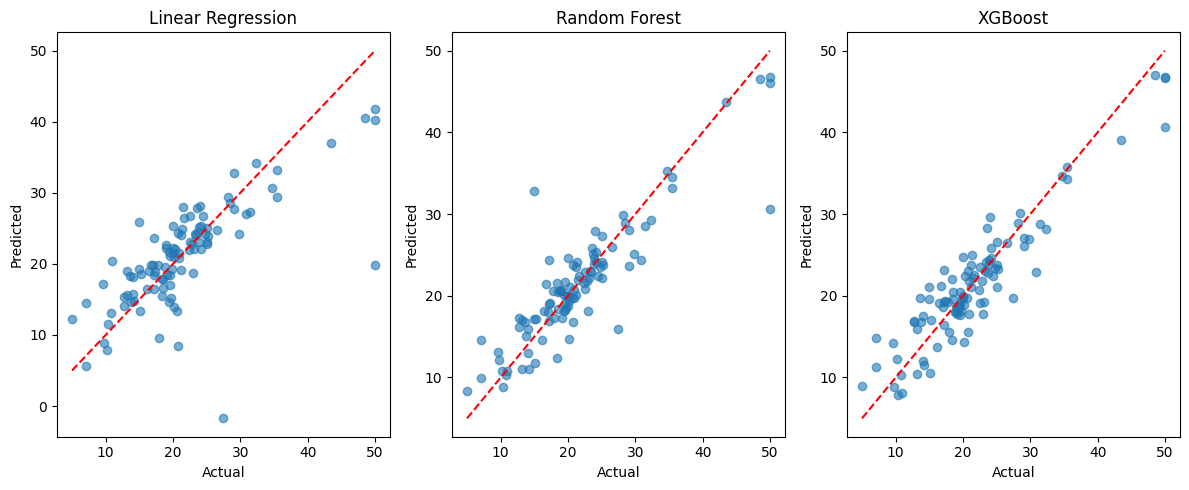

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_selected)

    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}")

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Get feature importance from RandomForest
rf_importance = models["Random Forest"].feature_importances_
xgb_importance = models["XGBoost"].feature_importances_

feature_names = X_train_selected.columns if hasattr(X_train_selected, "columns") else [f"Feature {i}" for i in range(X_train_selected.shape[1])]

rf_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importance}).sort_values(by="Importance", ascending=False)
xgb_df = pd.DataFrame({"Feature": feature_names, "Importance": xgb_importance}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_df)

print("\nXGBoost Feature Importance:")
print(xgb_df)


Random Forest Feature Importance:
     Feature  Importance
2  Feature 2    0.663639
1  Feature 1    0.157157
3  Feature 3    0.116428
4  Feature 4    0.058830
0  Feature 0    0.003946

XGBoost Feature Importance:
     Feature  Importance
2  Feature 2    0.460588
1  Feature 1    0.228542
0  Feature 0    0.127128
4  Feature 4    0.119828
3  Feature 3    0.063914
